# Forecasting - XRP

1) Imports

In [1]:
import warnings
import requests
import json
import pandas as pd
from datetime import datetime, date
warnings.filterwarnings("ignore")
from ts_utils import *

2) Coleta de dados

In [2]:
hj = date.today()
futuro_day = date.fromordinal(hj.toordinal()+30) # hoje + 30 dias
print("Data Limite Previsão",futuro_day)

Data Limite Previsão 2021-06-27


In [3]:


# Pegando dados da Api
dtf = get_data('xrp', sample_data=False)
# Convertendo timestamp para data
DS = []
for result in dtf['time']:
    DS.append(datetime.fromtimestamp(result))
dtf = pd.DataFrame([DS, dtf['close']]).T
dtf.head()


Buscando  todas  observações da moeda XRP
Dataset foi carregado! Formatando Dataset ...


,0,1
0,2010-07-16 21:00:00,0.0
1,2010-07-17 21:00:00,0.0
2,2010-07-18 21:00:00,0.0
3,2010-07-19 21:00:00,0.0
4,2010-07-20 21:00:00,0.0


In [4]:
dtf.columns = ['date', 'close']
ts = dtf.groupby("date")["close"].sum().rename("sales")
ts.tail()

date
2021-05-24 21:00:00    0.9743
2021-05-25 21:00:00    1.0330
2021-05-26 21:00:00    0.9726
2021-05-27 21:00:00    0.8994
2021-05-28 21:00:00    0.9004
Name: sales, dtype: float64

3) Analise de séries temporais

Numero de observações:  3970
Valor maximo: $ 2.78
Valor minimo: $ 0.0


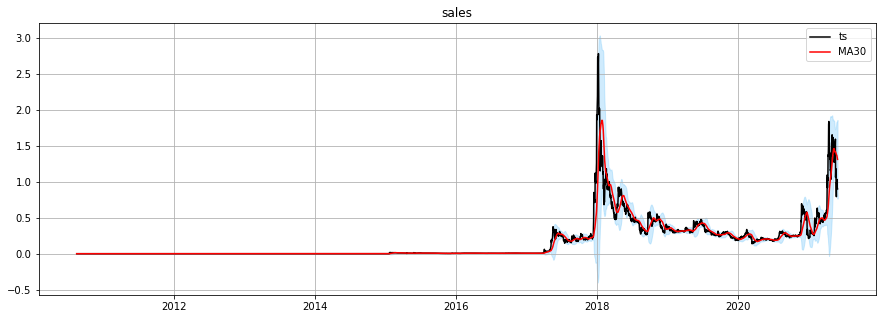

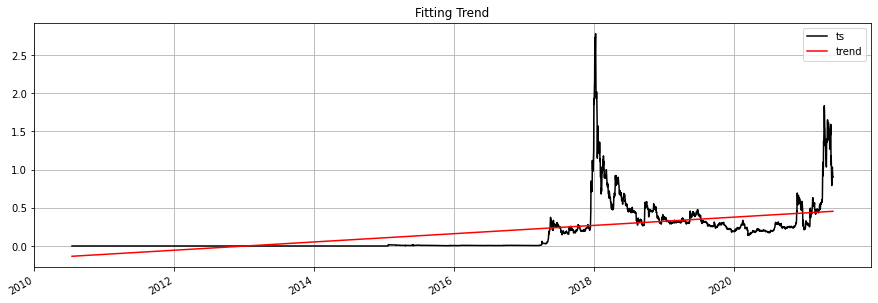

In [5]:
print("Numero de observações: ",len(ts))
print("Valor maximo: $",max(ts))
print("Valor minimo: $",min(ts))
w = 30
plot_ts(ts, plot_ma=True, plot_intervals=True, window=w, figsize=(15,5))
trend, line = fit_trend(ts, degree=1, plot=True, figsize=(15,5))

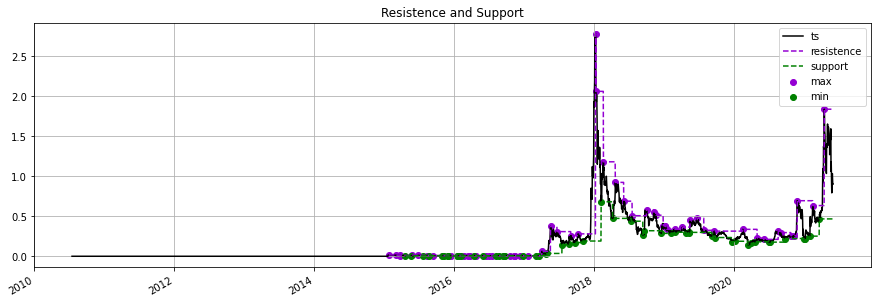

In [6]:
# Analise de maximos e minimos
res_sup = resistence_support(ts, window=30, trend=False, plot=True, figsize=(15,5))

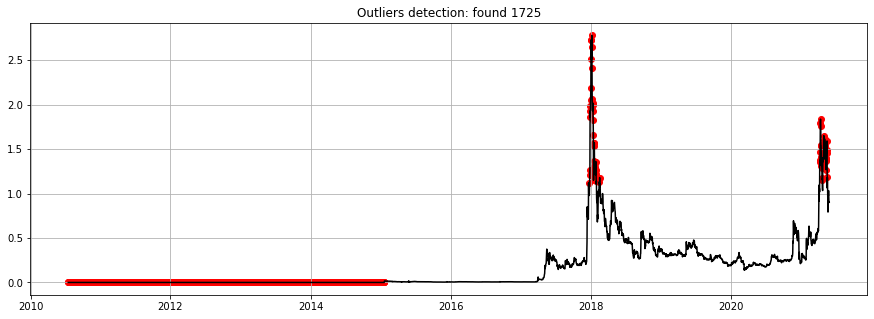

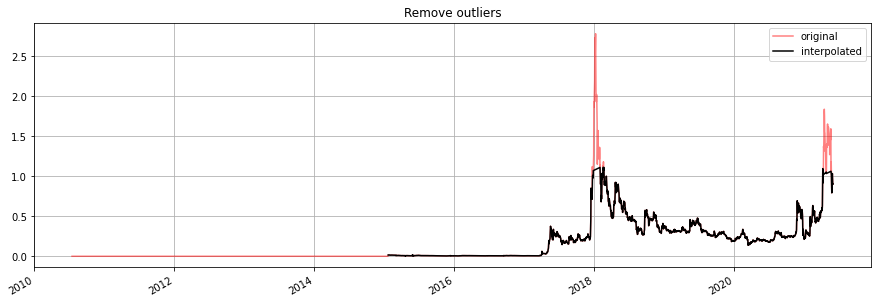

In [7]:
#Removendo outliers
dtf_outliers = find_outliers(ts, perc=0.05, figsize=(15,5))
ts_clean = remove_outliers(ts, outliers_idx=dtf_outliers[dtf_outliers["outlier"]==1].index, figsize=(15,5))

4) Processamento

--- splitting at index:  3930 | 2021-04-19 21:00:00 | test size: 0.01  ---


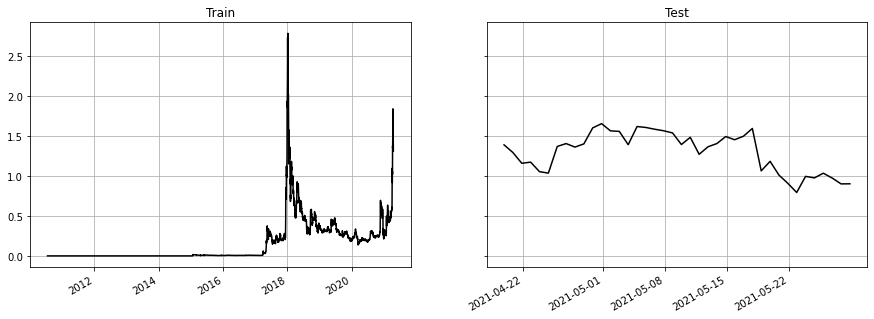

train: 3930 obs  |  test: 40 obs


In [8]:
ts_train, ts_test = split_train_test(ts, exog=None, test=0.01, plot=True, figsize=(15,5))
print("train:", len(ts_train), "obs  |  test:", len(ts_test), "obs")

5) Arima

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

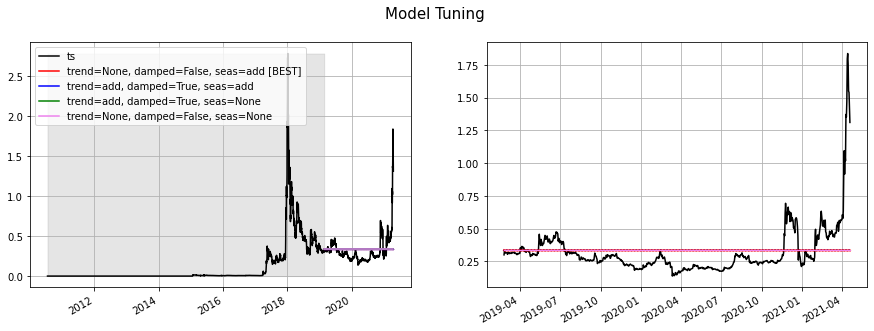

,combo,score,model
0,"trend=None, damped=False, seas=add",0.112890,<statsmodels.tsa.holtwinters.results.HoltWinte...
1,"trend=add, damped=True, seas=add",0.112890,<statsmodels.tsa.holtwinters.results.HoltWinte...
2,"trend=add, damped=True, seas=None",0.113642,<statsmodels.tsa.holtwinters.results.HoltWinte...
3,"trend=None, damped=False, seas=None",0.113642,<statsmodels.tsa.holtwinters.results.HoltWinte...
4,"trend=add, damped=False, seas=add",0.130769,<statsmodels.tsa.holtwinters.results.HoltWinte...


In [9]:
# Tuning
s=7
res = tune_expsmooth_model(ts_train, s=s, val_size=0.2, scoring=metrics.mean_absolute_error, top=4, figsize=(15,5))
res.head()

In [19]:
# Forecast unknown
#model = smt.ExponentialSmoothing(ts, trend="additive", damped=False, 
#                                 seasonal="multiplicative", seasonal_periods=s).fit(0.64)

#future = forecast_autoregressive(ts, model, end=futuro_day, conf=0.30, zoom=30, figsize=(15,5))

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

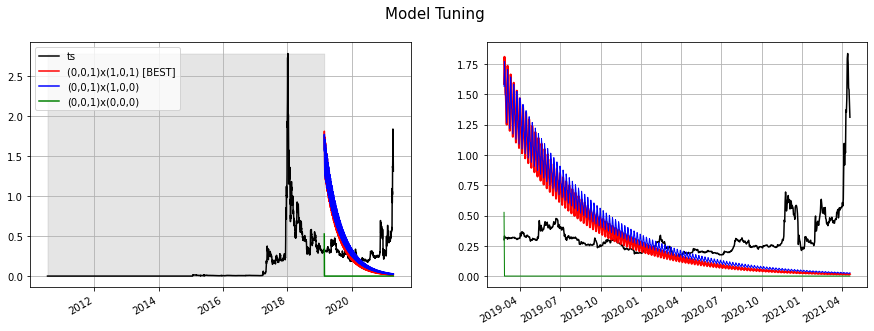

,combo,score,model
0,"(0,0,1)x(1,0,1)",0.309417,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
1,"(0,0,1)x(1,0,0)",0.316813,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
2,"(0,0,1)x(0,0,0)",0.318772,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
3,"(0,0,0)x(0,0,0)",0.318868,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
4,"(0,0,1)x(0,0,1)",0.319747,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


In [11]:
# *pode demorar
res = tune_arima_model(ts_train, s=s, val_size=0.2, max_order=(1,1,1), seasonal_order=(1,0,1),
                        scoring=metrics.mean_absolute_error, top=3, figsize=(15,5))
res.head()

In [12]:
# *pode demorar
find_best_sarimax(ts_train, seasonal=True, stationary=False, s=s, exog=None,
                  max_p=10, max_d=3, max_q=10, 
                  max_P=1, max_D=1, max_Q=1)

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anacond

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3930
Model:               SARIMAX(2, 1, 2)   Log Likelihood                8256.384
Date:                Fri, 28 May 2021   AIC                         -16500.768
Time:                        21:17:44   BIC                         -16463.111
Sample:                             0   HQIC                        -16487.408
                               - 3930                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.863e-05      0.000      0.408      0.683      -0.000       0.000
ar.L1          0.0660      0.015      4.325      0.000       0.036       0.096
ar.L2          0.7504      0.010     74.042      0.000       0.731       0.770
ma.L1          0.0222      0.015      1.468      0.142      -0.007       0.052
ma.L2         -0.7631      0.011    -72.454      0.000      -0.784      -0.742
sigma2         0.0009   2.74e-06    318.141      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):           3424185.64
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):           36550.80   Skew:                             3.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       147.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Trend parameters: d=1
Seasonal parameters: Seasonality every 7 observations
Exog parameters: Not given
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


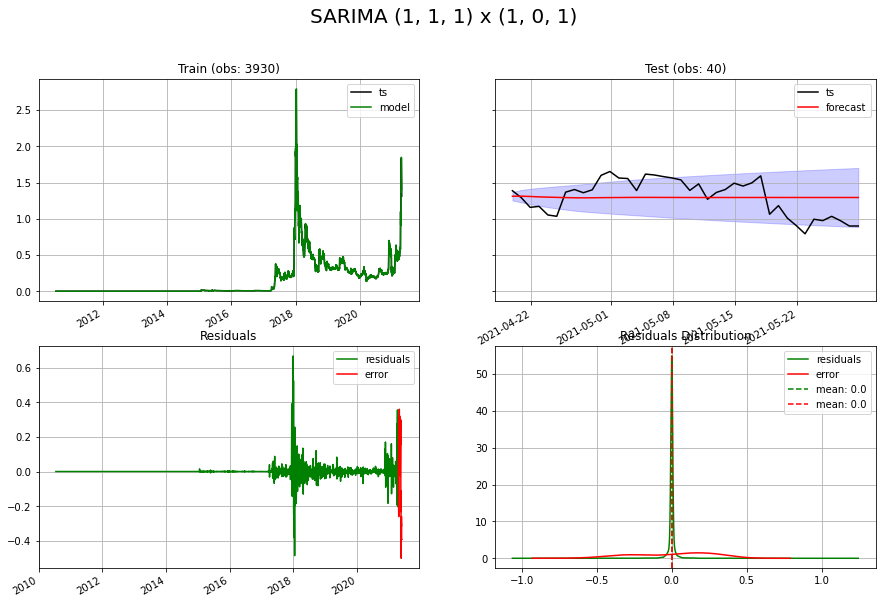

Training --> Residuals mean: 0.0  | std: 0.0
Test --> Error mean: 0.0  | std: 0.0  | mae: 0.0  | mape: 19.0 %  | mse: 0.0  | rmse: 0.0


In [13]:
# Traino/Test
dtf, model = fit_sarimax(ts_train, ts_test, order=(1,1,1), seasonal_order=(1,0,1), s=s, conf=0.95, figsize=(15,10))

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
--- generating index date --> start: 2021-05-29 21:00:00 | end: 2021-06-26 21:00:00 | len: 29 ---


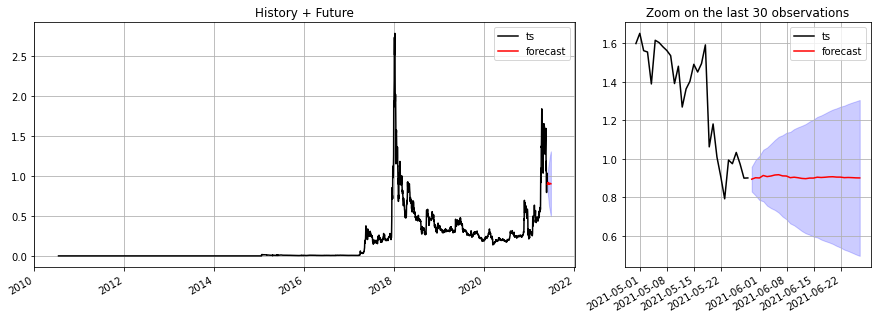

In [14]:
# previsão
model = smt.SARIMAX(ts, order=(1,1,1), seasonal_order=(1,0,1,s), exog=None).fit()

future = forecast_autoregressive(ts, model, end=futuro_day, conf=0.95, zoom=30, figsize=(15,5))

6) LSTM

In [ ]:
s = 365
n_features = 1

In [ ]:
model = models.Sequential()
model.add( layers.LSTM(input_shape=(s,n_features), units=50, activation='relu', return_sequences=True) )
model.add( layers.Dropout(0.2) )
model.add( layers.LSTM(units=50, activation='relu', return_sequences=False) )
model.add( layers.Dense(1) )
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

In [ ]:
dtf, model = fit_lstm(ts_train, ts_test, model, exog=None, s=s, epochs=100, conf=0.20, figsize=(15,10))

In [ ]:
future = forecast_lstm(ts, model, conf=0.20, end=futuro_day, freq="D", zoom=30, figsize=(15,5))

7) Prophet

In [15]:
# Crie dataframe com colunas 'ds' (datas), 'y' (valores), 'cap' (capacidade de crescimento = "logística")
dtf_train = ts_train.reset_index().rename(columns={"date":"ds", "sales":"y"})
dtf_test = ts_test.reset_index().rename(columns={"date":"ds", "sales":"y"})

dtf_train.tail()

,ds,y
3925,2021-04-14 21:00:00,1.759
3926,2021-04-15 21:00:00,1.550
3927,2021-04-16 21:00:00,1.540
3928,2021-04-17 21:00:00,1.411
3929,2021-04-18 21:00:00,1.311


In [16]:
# Crie feriados dataFrame com as colunas 'ds' (datas) e 'feriado' (string ex 'xmas')
dtf_holidays = None

In [17]:
model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
                yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
                holidays=dtf_holidays, interval_width=0.80)

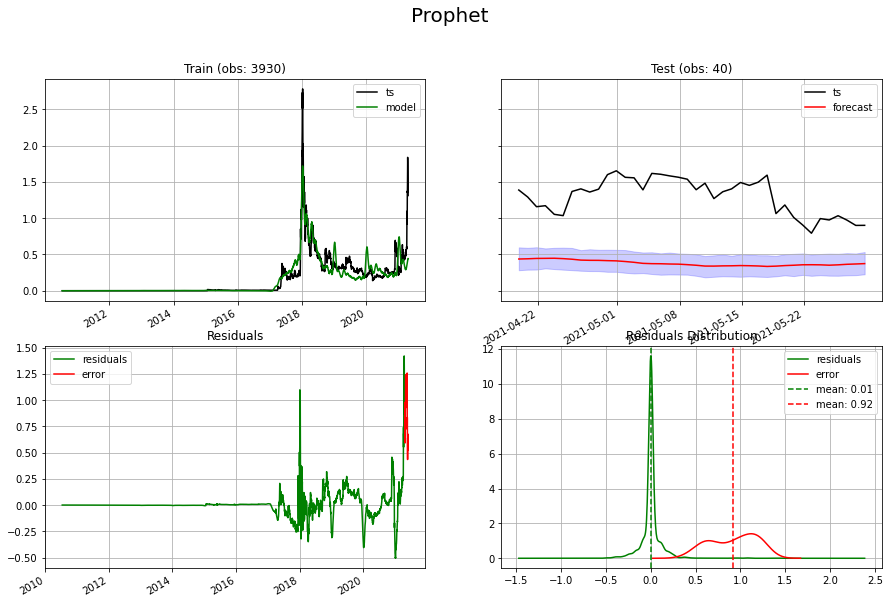

Training --> Residuals mean: 0.0  | std: 0.0
Test --> Error mean: 1.0  | std: 0.0  | mae: 1.0  | mape: 70.0 %  | mse: 1.0  | rmse: 1.0


In [18]:
dtf, model = fit_prophet(dtf_train, dtf_test, model=model, freq="D", figsize=(15,10))

In [20]:
dtf = ts.reset_index().rename(columns={"date":"ds", "sales":"y"})
dtf.tail()

,ds,y
3965,2021-05-24 21:00:00,0.9743
3966,2021-05-25 21:00:00,1.0330
3967,2021-05-26 21:00:00,0.9726
3968,2021-05-27 21:00:00,0.8994
3969,2021-05-28 21:00:00,0.9004


In [21]:
model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
                yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
                holidays=dtf_holidays, interval_width=0.80)

--- generating index date --> start: 2021-05-29 21:00:00 | end: 2021-06-26 21:00:00 | len: 29 ---


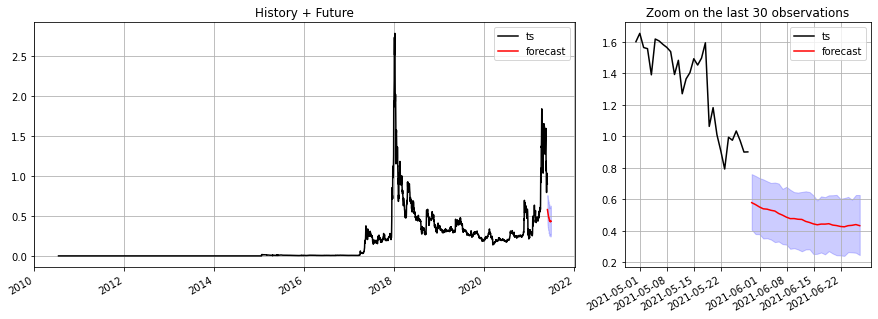

In [22]:
future = forecast_prophet(dtf, model, end=futuro_day, freq="D", zoom=30, figsize=(15,5))